In [2]:
# Importing libraries
from tropical.clustering import ClusterSequences
from tropical.discretize_path import DomPath
from tropical.sequence_analysis import Sequences
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from mm_two_paths_model import model

In [3]:
pars = np.load('calibrated_pars.npy')
tspan = np.linspace(0, 100, 101)
sim = ScipyOdeSimulator(model, tspan=tspan).run(param_values=pars[:100])

In [5]:
# sim.save('sims_100.h5')

In [6]:
dp = DomPath(model=model, simulations='sims_100.h5', type_analysis='production', dom_om=1, target='s5', depth=2)
signs, paths = dp.get_path_signatures(cpu_cores=1, verbose=True)

In [7]:
signs.dissimilarity_matrix(n_jobs=4)
signs.silhouette_score_agglomerative_range(4)
signs.agglomerative_clustering(2)

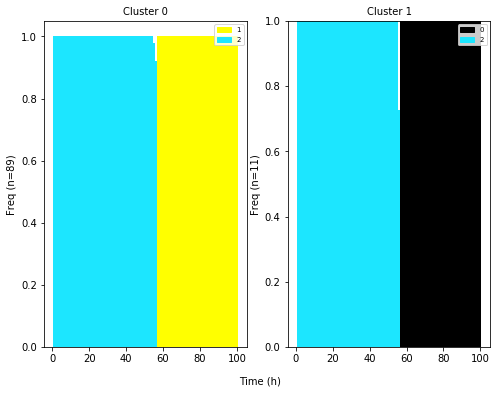

In [8]:
signs.plot_sequences()

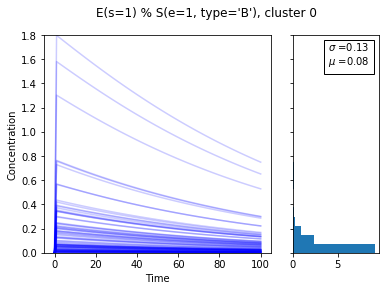

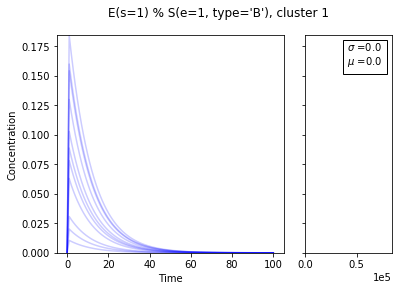

In [15]:
%matplotlib inline
from tropical.visualize_trajectories import VisualizeTrajectories

clusters = signs.labels
ac = VisualizeTrajectories(model=model, sim_results='sims_100.h5', clusters=clusters)
ac.plot_cluster_dynamics(species=[4], norm=False)